## Data loading

### Subtask:
Load the "income.csv" dataset.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('income.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'income.csv' not found.")
    df = None # or handle the error as appropriate
except pd.errors.EmptyDataError:
    print("Error: 'income.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'income.csv'. Check the file format.")
    df = None

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


(48842, 7)


## Data exploration

### Subtask:
Explore the data to understand its structure, identify missing values, and examine the distribution of features.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education_num   48842 non-null  int64
 3   capital_gain    48842 non-null  int64
 4   capital_loss    48842 non-null  int64
 5   hours_per_week  48842 non-null  int64
 6   income_level    48842 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB
None
age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
income_level      0
dtype: int64
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403

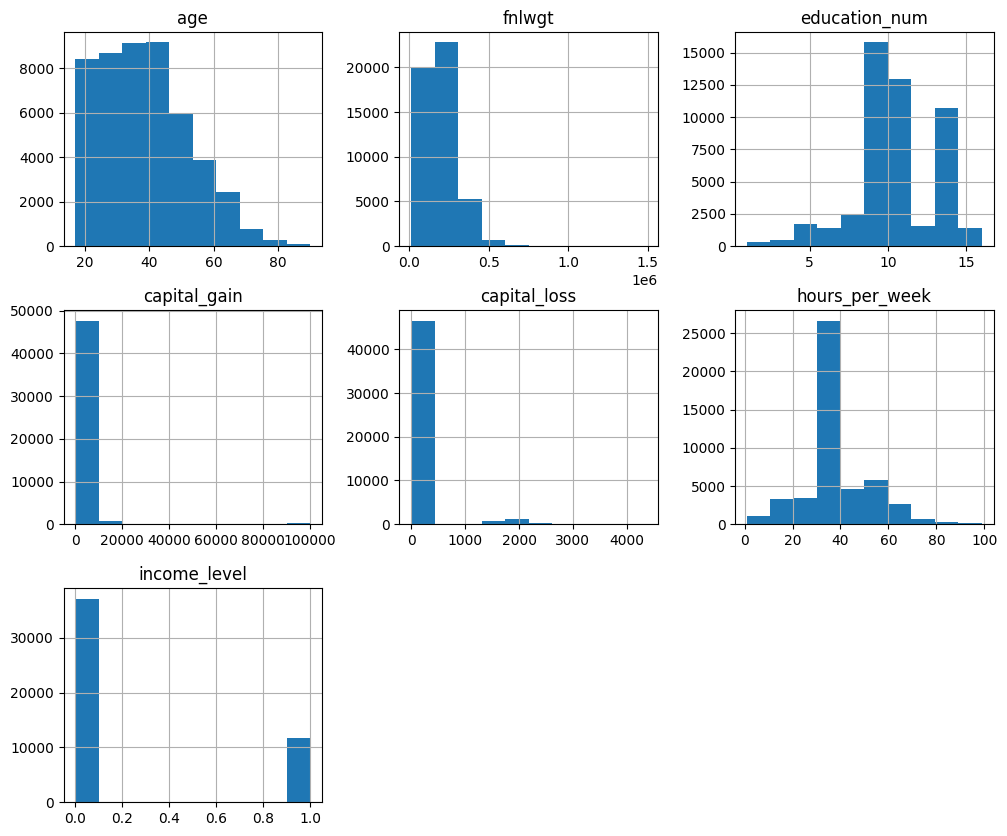


Value counts for income_level:
income_level
0    37155
1    11687
Name: count, dtype: int64


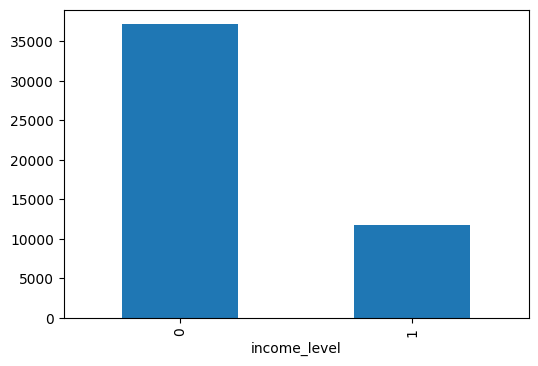


Number of duplicated rows: 393


<Figure size 800x600 with 0 Axes>

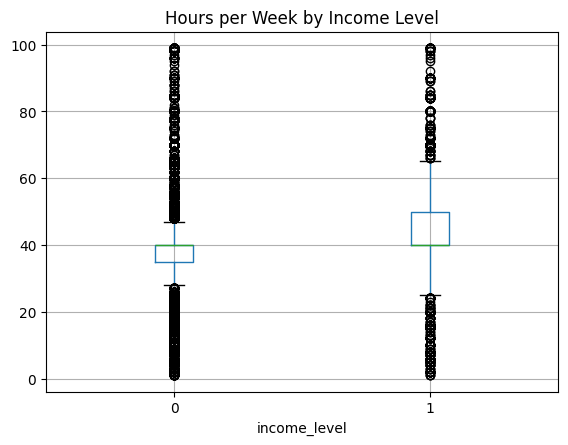

<Figure size 800x600 with 0 Axes>

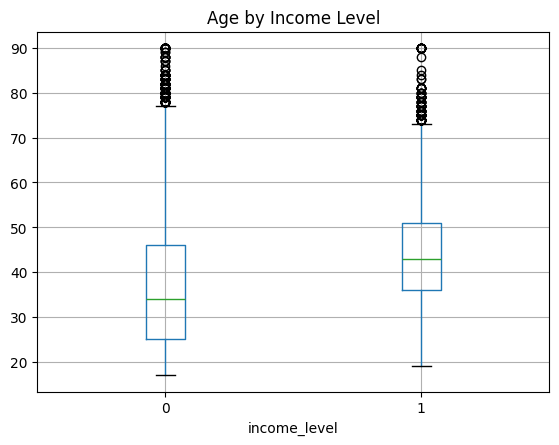

In [2]:
# Examine data types and missing values
print(df.info())
print(df.isnull().sum())

# Analyze numerical features
print(df.describe())
# Since matplotlib backend is already inline, I can directly plot.
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.show()

# Analyze categorical features
for col in ['income_level']:  # Add other categorical columns if needed
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar', figsize=(6,4))
    plt.show()

# Check for duplicates
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")

# Examine relationship between features and target variable (example)
# Assuming 'hours_per_week' is numerical and 'education_num' is categorical
plt.figure(figsize=(8,6))
df.boxplot(column='hours_per_week', by='income_level')
plt.title("Hours per Week by Income Level")
plt.suptitle('') # remove default suptitle
plt.show()

plt.figure(figsize=(8,6))
df.boxplot(column='age', by='income_level')
plt.title("Age by Income Level")
plt.suptitle('') # remove default suptitle
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by handling duplicates, converting categorical features to numerical representations, and separating features from the target variable.


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop duplicates
df.drop_duplicates(inplace=True)

# Define numerical and categorical features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_features = [] # There are no categorical features in the provided data.

# Create transformers
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X = df.drop('income_level', axis=1)
y = df['income_level']
X = preprocessor.fit_transform(X)

## Data splitting

### Subtask:
Split the preprocessed data into training and testing sets.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train an AdaBoost classifier with 10 estimators on the prepared training data.


In [5]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

## Model evaluation

### Subtask:
Evaluate the initial AdaBoost model's performance on the test set.


Accuracy: 0.8207430340557276

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7341
           1       0.73      0.41      0.53      2349

    accuracy                           0.82      9690
   macro avg       0.78      0.68      0.71      9690
weighted avg       0.81      0.82      0.80      9690



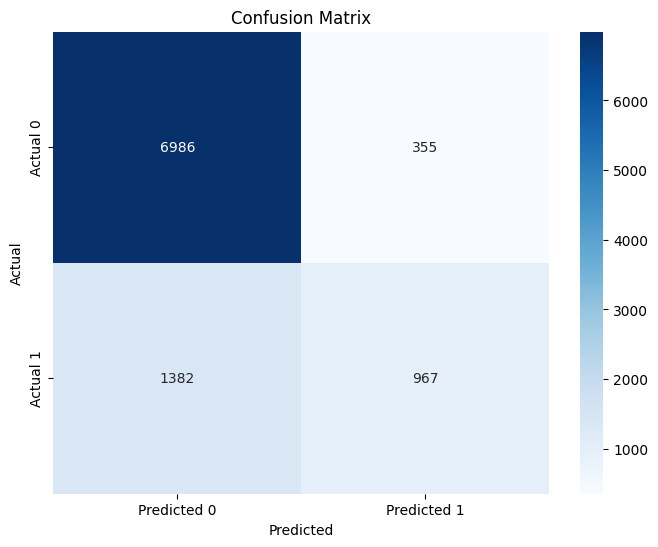

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print other classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model optimization

### Subtask:
Optimize the AdaBoost classifier by tuning the `n_estimators` hyperparameter.


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': range(10, 201, 10)}

# Create an AdaBoostClassifier
ada_model = AdaBoostClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_ada_model = grid_search.best_estimator_

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'n_estimators': 200}
Best Score: 0.8329420991518921


## Model evaluation

### Subtask:
Evaluate the best AdaBoost model found during hyperparameter optimization on the test set.


Accuracy of the best model: 0.829514963880289

Classification Report for the best model:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      7341
           1       0.77      0.43      0.55      2349

    accuracy                           0.83      9690
   macro avg       0.80      0.69      0.72      9690
weighted avg       0.82      0.83      0.81      9690



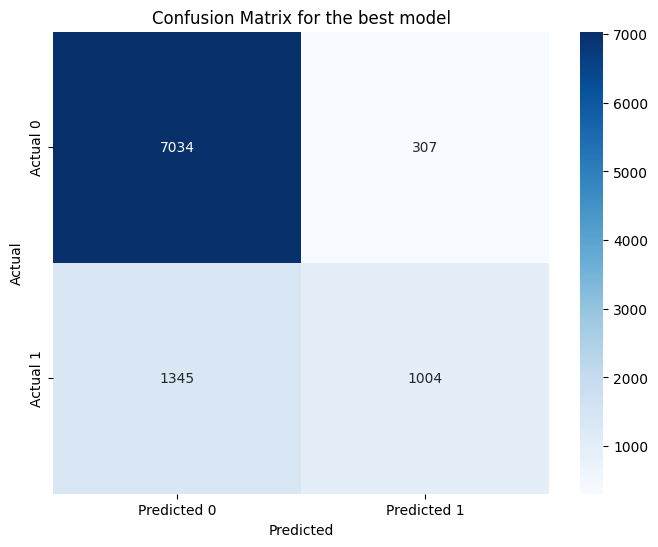

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set using the best model
y_pred_best = best_ada_model.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best model: {accuracy_best}")

# Generate classification report
print("\nClassification Report for the best model:\n", classification_report(y_test, y_pred_best))

# Generate and display the confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for the best model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()